<a href="https://colab.research.google.com/github/kelvinfoo123/Time-Series-Analysis/blob/main/Store_sales_analysis_(ARIMA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

## **Load data set**

In [27]:
train = pd.read_csv("train.csv")
train.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [4]:
transactions = pd.read_csv("transactions.csv")
transactions.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [28]:
# Convert date from string format to date time format 

train['date'] = pd.to_datetime(train.date)
transactions['date'] = pd.to_datetime(transactions.date)

In [6]:
# Rename transactions column in transactions to sales 

transactions = transactions.rename(columns = {'transactions' : 'sales'})
transactions.head()

,date,store_nbr,sales
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


## **Data Visualization**

In [7]:
trans_copy = transactions.copy()
trans_copy.head()

,date,store_nbr,sales
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [8]:
# Set date as index of time series 

trans_copy = trans_copy.set_index('date')
trans_copy.head()

,store_nbr,sales
date,,
2013-01-01,25,770
2013-01-02,1,2111
2013-01-02,2,2358
2013-01-02,3,3487
2013-01-02,4,1922


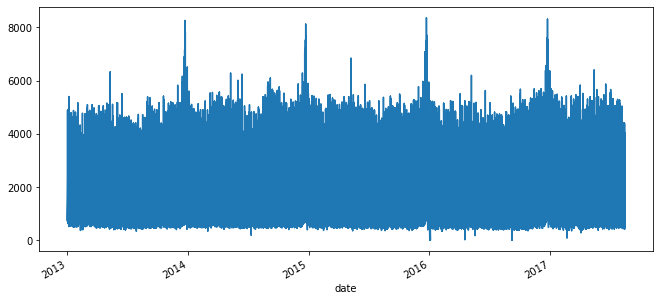

In [9]:
# Plot time series of sales 

trans_copy['sales'].plot(figsize = (11,5))

In [10]:
trans_copy = transactions.copy()

trans_copy_mean = trans_copy.groupby('date').mean()
trans_copy_mean.head()

,store_nbr,sales
date,,
2013-01-01,25.000000,770.000000
2013-01-02,26.304348,2026.413043
2013-01-03,26.304348,1706.608696
2013-01-04,26.304348,1706.391304
2013-01-05,26.304348,2034.195652


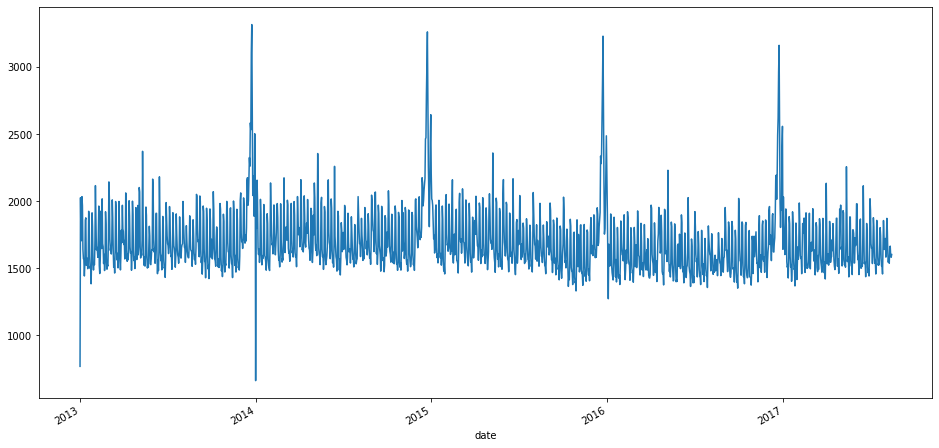

In [12]:
# Time series of mean of sales on each date 

trans_copy_mean['sales'].plot(figsize = (16,8))

In [29]:
train_copy = train.copy()

train_copy_mean = train_copy.groupby('date').mean()
train_copy_mean.head()

,id,store_nbr,sales,onpromotion
date,,,,
2013-01-01,890.5,27.5,1.409438,0.0
2013-01-02,2672.5,27.5,278.390807,0.0
2013-01-03,4454.5,27.5,202.840197,0.0
2013-01-04,6236.5,27.5,198.911154,0.0
2013-01-05,8018.5,27.5,267.873244,0.0


In [31]:
train_copy_mean.dropna()

,id,store_nbr,sales,onpromotion
date,,,,
2013-01-01,890.5,27.5,1.409438,0.000000
2013-01-02,2672.5,27.5,278.390807,0.000000
2013-01-03,4454.5,27.5,202.840197,0.000000
2013-01-04,6236.5,27.5,198.911154,0.000000
2013-01-05,8018.5,27.5,267.873244,0.000000
...,...,...,...,...
2017-08-11,2992868.5,27.5,463.733851,7.956790
2017-08-12,2994650.5,27.5,444.798280,4.664422
2017-08-13,2996432.5,27.5,485.768618,5.209315


## **Stationarity analysis**

In [33]:
import statsmodels.api as sm 
from statsmodels.tsa.stattools import adfuller 

In [34]:
def adfuller_test(sales): 
  result = adfuller(sales, autolag = None, maxlag = 1)
  labels = ['ADF Test Statistics', 'p-value', 'Lags used', 'Number of observations']
  for value, label in zip(result,labels): 
    print(label + ' : ' + str(value))
  if result[1] <= 0.05: # p-value <= 0.05 
    print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
  else: 
    print("weak evidence against null hypothesis,indicating it is non-stationary")

In [35]:
adfuller_test(train_copy_mean['sales'])

ADF Test Statistics : -14.832592249243106
p-value : 1.8893125859112615e-27
Lags used : 1
Number of observations : 1682
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary


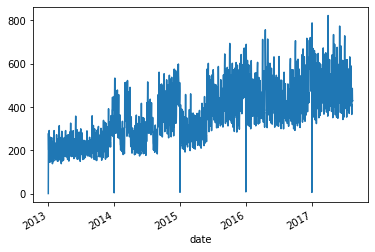

In [36]:
train_copy_mean['sales'].plot()

## **ACF and PACF Plot**

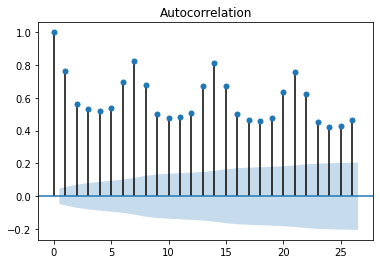

In [39]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 

fig_acf = sm.graphics.tsa.plot_acf(train_copy_mean['sales'].dropna(), lags = 26)

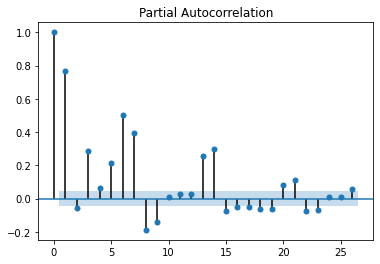

In [40]:
fig_acf = sm.graphics.tsa.plot_pacf(train_copy_mean['sales'].dropna(), lags = 26)

We see that the ACF does not diw down. This implies that data is not stationary.

In [43]:
# Apply differencing to make data stationary

train_copy_mean['sales_first_diff'] = train_copy_mean['sales'] - train_copy_mean['sales'].shift(1)
train_copy_mean.head()

,id,store_nbr,sales,onpromotion,sales first diff,sales_first_diff
date,,,,,,
2013-01-01,890.5,27.5,1.409438,0.0,NaN,NaN
2013-01-02,2672.5,27.5,278.390807,0.0,276.981369,276.981369
2013-01-03,4454.5,27.5,202.840197,0.0,-75.550610,-75.550610
2013-01-04,6236.5,27.5,198.911154,0.0,-3.929043,-3.929043
2013-01-05,8018.5,27.5,267.873244,0.0,68.962090,68.962090


In [45]:
adfuller_test(train_copy_mean['sales_first_diff'].dropna())

ADF Test Statistics : -44.329840563631706
p-value : 0.0
Lags used : 1
Number of observations : 1681
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary


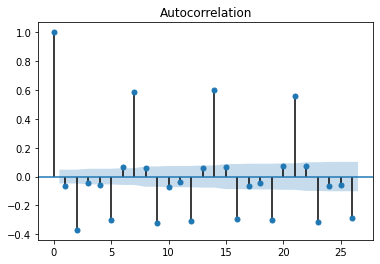

In [46]:
fig_acf = sm.graphics.tsa.plot_acf(train_copy_mean['sales_first_diff'].dropna(), lags = 26)

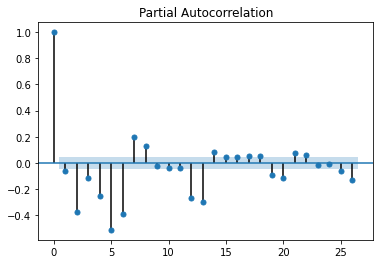

In [47]:
fig_pacf = sm.graphics.tsa.plot_pacf(train_copy_mean['sales_first_diff'].dropna(), lags = 26)

PACF dies down at lag 14. We build an AR(14) model. 

## **Building models**

In [48]:
from statsmodels.tsa.arima.model import ARIMA 
AR_model = ARIMA(train_copy_mean['sales_first_diff'], order = (14,0,0))
results_ar = AR_model.fit()
print(results_ar.summary())

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


                               SARIMAX Results                                
Dep. Variable:       sales_first_diff   No. Observations:                 1684
Model:                ARIMA(14, 0, 0)   Log Likelihood               -9161.983
Date:                Wed, 14 Dec 2022   AIC                          18355.965
Time:                        05:39:53   BIC                          18442.828
Sample:                             0   HQIC                         18388.137
                               - 1684                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1618      0.313      0.517      0.605      -0.452       0.775
ar.L1         -0.5147      0.011    -47.516      0.000      -0.536      -0.493
ar.L2         -0.5655      0.020    -28.423      0.0